### Imports 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from datasist.structdata import detect_outliers
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay



sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv(r"F:\Data Science\Course\football project2\international_matches_for_model.csv")
df

,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,...,mean_teams_goals_difference,check_mean_teams_goals_difference,mode_of_goals_home_team,mode_of_goals_away_team,mode_of_goals_difference,home_team_will_score,away_team_will_score,new_col,which_teams_scored_goals,who_will_scored
0,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,...,0.2,0,1,1,0,2,1,1,2,1
1,Brazil,Mexico,South America,North America,8,14,0,0,1,1,...,1.0,1,2,1,1,1,1,2,1,2
2,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,...,1.0,1,1,0,1,2,0,2,2,2
3,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,...,1.3,1,1,2,-1,1,0,2,2,2
4,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,...,-0.1,0,2,2,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,...,0.6,1,0,0,0,2,1,2,2,2
23917,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,...,-0.6,0,0,0,0,0,2,0,0,0
23918,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,...,0.8,1,2,1,1,0,0,2,1,2
23919,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,...,0.7,1,1,1,0,0,2,2,0,2


### Features Selection 

In [3]:
df = df[["home_team","away_team","home_team1","away_team1",
         "mean_home_team_rank","mean_away_team_rank","rank_difference",
         "mean_team_home_goals","mean_team_away_goals","home_team_will_score","away_team_will_score",
         'home_team_max_points','away_team_max_points',"points_difference","check_points_difference",
        "away_team_loss_percentage","Home_Team_Result"]]

In [4]:
df

,home_team,away_team,home_team1,away_team1,mean_home_team_rank,mean_away_team_rank,rank_difference,mean_team_home_goals,mean_team_away_goals,home_team_will_score,away_team_will_score,home_team_max_points,away_team_max_points,points_difference,check_points_difference,away_team_loss_percentage,Home_Team_Result
0,Bolivia,Uruguay,0,12,68,23,45,1.5,1.3,2,1,1374,2017,-643,0,0.40,2
1,Brazil,Mexico,1,32,3,14,-11,2.4,1.4,1,1,2160,1672,488,1,0.39,1
2,Ecuador,Venezuela,2,29,41,67,-26,1.8,0.8,2,0,1458,1517,-59,0,0.62,2
3,Guinea,Sierra Leone,3,67,70,105,-35,1.8,0.5,1,0,1354,1179,175,1,0.69,2
4,Paraguay,Argentina,4,13,34,6,28,1.5,1.6,1,2,1484,1766,-282,0,0.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,Moldova,Andorra,122,177,122,165,-43,0.9,0.3,2,1,985,1120,-135,0,0.89,2
23917,Liechtenstein,Latvia,57,105,155,90,65,0.4,1.0,0,2,944,1122,-178,0,0.55,0
23918,Chile,Ghana,98,71,28,41,-13,1.8,1.0,0,0,1579,1439,140,1,0.43,0
23919,Japan,Tunisia,39,35,34,34,0,1.9,1.2,0,2,1553,1526,27,1,0.37,0


In [5]:
corr = df.corr()
corr

,home_team1,away_team1,mean_home_team_rank,mean_away_team_rank,rank_difference,mean_team_home_goals,mean_team_away_goals,home_team_will_score,away_team_will_score,home_team_max_points,away_team_max_points,points_difference,check_points_difference,away_team_loss_percentage,Home_Team_Result
home_team1,1.000000,0.314848,0.642178,0.387026,0.253156,-0.191671,-0.137069,-0.078225,0.083262,-0.574582,-0.358278,-0.208885,-0.193325,0.234743,-0.106525
away_team1,0.314848,1.000000,0.381765,0.645230,-0.271785,-0.046274,-0.330818,0.136862,-0.104151,-0.359180,-0.569569,0.196393,0.179479,0.479788,0.151861
mean_home_team_rank,0.642178,0.381765,1.000000,0.512031,0.486418,-0.546817,-0.198925,-0.180143,0.175372,-0.889238,-0.466940,-0.406096,-0.342079,0.320739,-0.225121
mean_away_team_rank,0.387026,0.645230,0.512031,1.000000,-0.501441,-0.093869,-0.642744,0.233375,-0.199269,-0.477735,-0.885758,0.382496,0.324174,0.840889,0.268323
rank_difference,0.253156,-0.271785,0.486418,-0.501441,1.000000,-0.455297,0.453421,-0.418834,0.379336,-0.409739,0.430653,-0.798108,-0.674301,-0.532274,-0.499686
mean_team_home_goals,-0.191671,-0.046274,-0.546817,-0.093869,-0.455297,1.000000,0.170625,0.234395,-0.159220,0.512852,0.111511,0.383490,0.319030,-0.114789,0.245997
mean_team_away_goals,-0.137069,-0.330818,-0.198925,-0.642744,0.453421,0.170625,1.000000,-0.197194,0.253327,0.203701,0.641580,-0.412766,-0.334822,-0.823430,-0.280596
home_team_will_score,-0.078225,0.136862,-0.180143,0.233375,-0.418834,0.234395,-0.197194,1.000000,-0.120365,0.162560,-0.208470,0.352226,0.303387,0.267700,0.694174
away_team_will_score,0.083262,-0.104151,0.175372,-0.199269,0.379336,-0.159220,0.253327,-0.120365,1.000000,-0.152752,0.190360,-0.325740,-0.278506,-0.236410,-0.646938
home_team_max_points,-0.574582,-0.359180,-0.889238,-0.477735,-0.409739,0.512852,0.203701,0.162560,-0.152752,1.000000,0.445745,0.531757,0.400067,-0.299265,0.200283


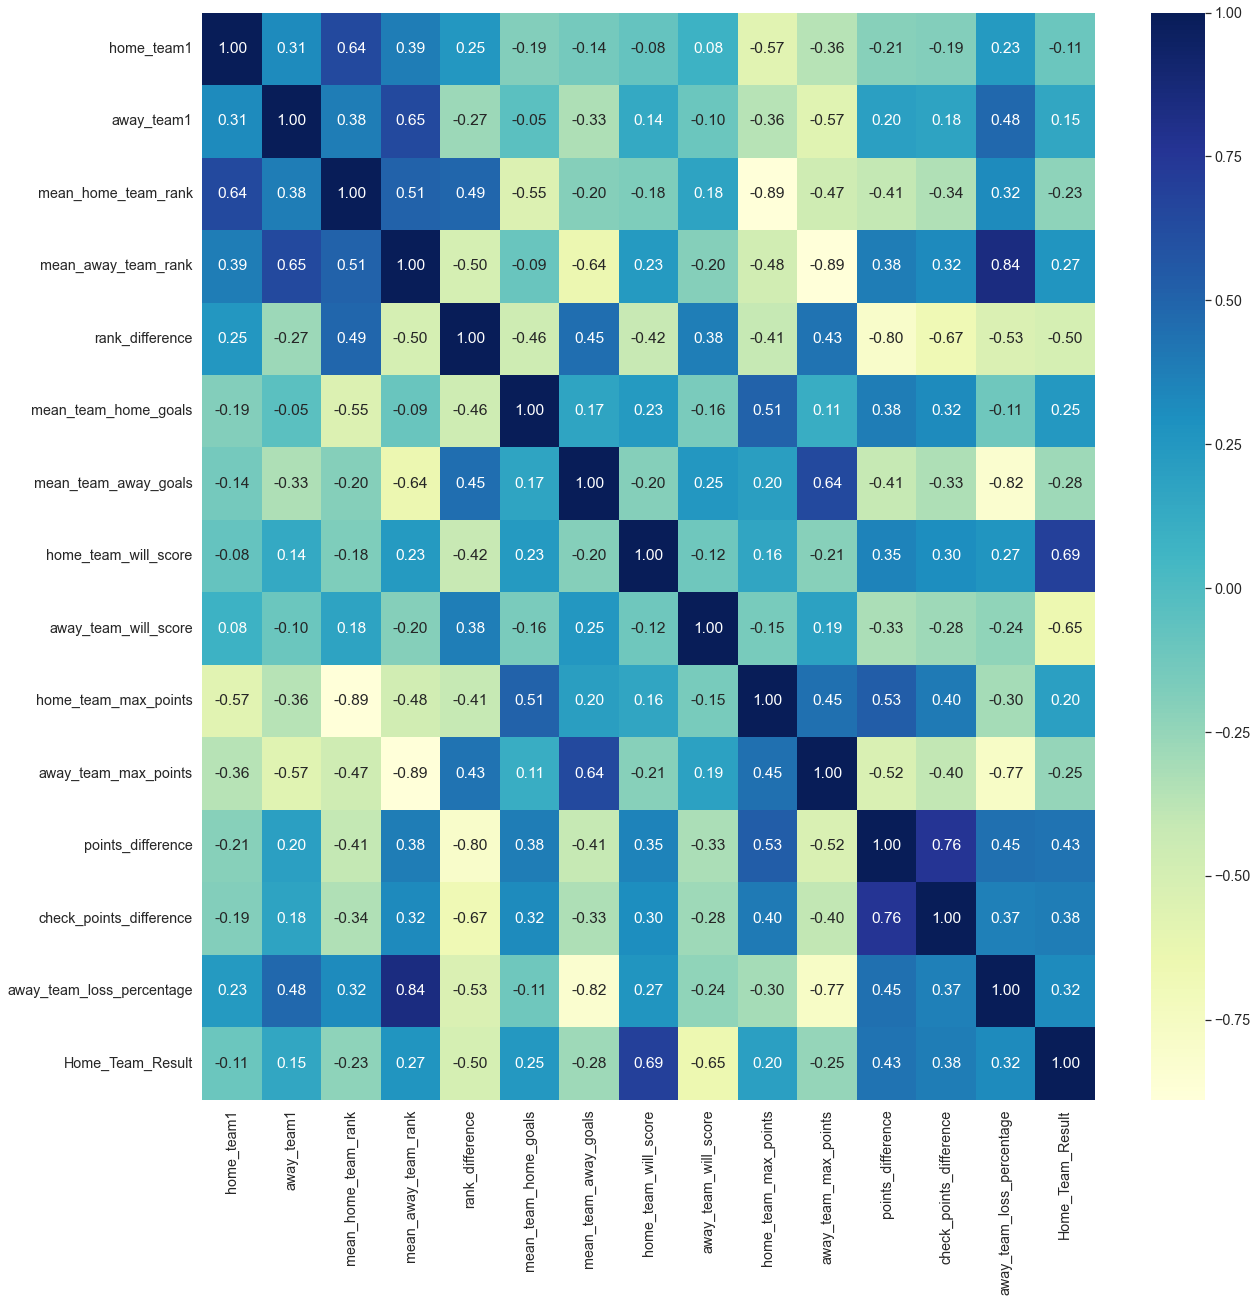

In [6]:
plt.figure(figsize = (20, 20))
sns.heatmap(data=corr, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [7]:
df["home_team_result"] = df["Home_Team_Result"]

In [8]:
df["home_team"] = df["home_team1"]
df["away_team"] = df["away_team1"]

In [9]:
columns = ["home_team1","away_team1","Home_Team_Result"]
df.drop(columns, axis=1, inplace=True)

### Machine Learning Model

In [10]:
x = df.drop(['home_team_result'], axis=1)
y = df['home_team_result']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)     

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Train Score', model.score(x_train, y_train))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Train Score 0.987614966555184
Accuracy Score: 0.9304075235109718


In [13]:
model = XGBClassifier(random_state=42, gamma=0.5, max_depth=3, n_estimators=120, learning_rate=0.1)
model.fit(x_train.values,y_train)
y_pred = model.predict(x_test)
print('Train Score', model.score(x_train, y_train))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Train Score 0.9471676421404682
Accuracy Score: 0.9379310344827586


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1354
           1       0.85      0.92      0.88      1078
           2       0.96      0.96      0.96      2353

    accuracy                           0.94      4785
   macro avg       0.93      0.93      0.93      4785
weighted avg       0.94      0.94      0.94      4785



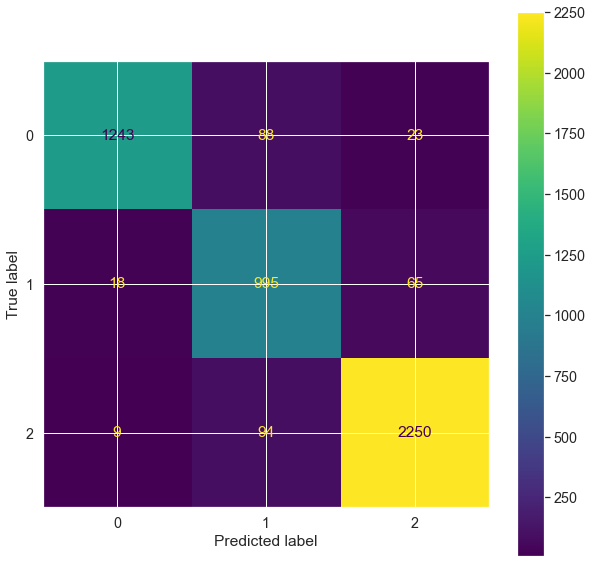

In [15]:
predictions = y_pred
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

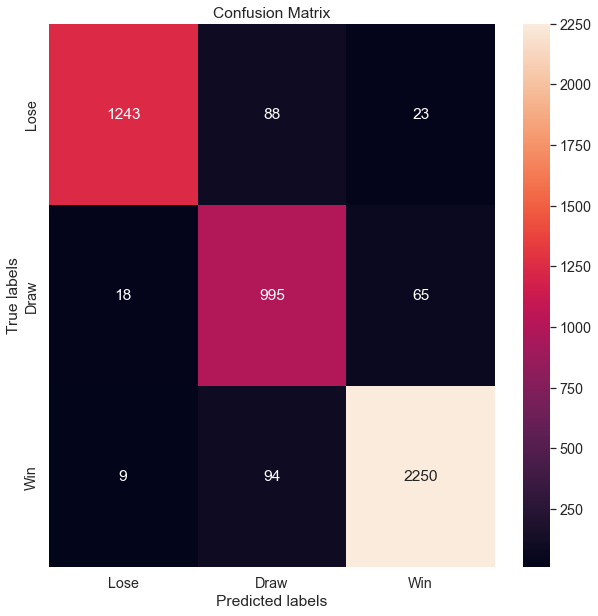

In [16]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Lose","Draw","Win"]); ax.yaxis.set_ticklabels(["Lose","Draw","Win"]);

In [17]:
df.columns

Index(['home_team', 'away_team', 'mean_home_team_rank', 'mean_away_team_rank',
       'rank_difference', 'mean_team_home_goals', 'mean_team_away_goals',
       'home_team_will_score', 'away_team_will_score', 'home_team_max_points',
       'away_team_max_points', 'points_difference', 'check_points_difference',
       'away_team_loss_percentage', 'home_team_result'],
      dtype='object')

In [18]:
def home_team_result(result):
        if result == 2:
            return "Win"
        elif result == 1:
            return "Lose"
        else:
            return "Draw" 

In [19]:
len(x.columns)

14

In [20]:
home_team_result(model.predict([x_test.iloc[1]])[0])

'Win'

In [21]:
home_team_result(model.predict([x_test.iloc[4]])[0])

'Lose'

In [22]:
home_team_result(model.predict([x_test.iloc[7]])[0])

'Draw'

In [23]:
#joblib.dump(model,r'F:\Data Science\Course\football project2\last\last_model.h5')